In [1]:
#!/usr/bin/env python
# coding: utf-8

"""
Big Data - Projekt: Ewolucja Globalnego Rynku Gier Wideo
Czƒô≈õƒá 2: Zaawansowana Analiza - PCA, Clustering, Wizualizacje
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings('ignore')

In [10]:

# ========================================
# KONFIGURACJA
# ========================================

VERBOSE = True
SAVE_PLOTS = True
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

In [3]:

# ========================================
# 1. WCZYTANIE OCZYSZCZONYCH DANYCH
# ========================================

print("="*80)
print("ZAAWANSOWANA ANALIZA DANYCH - PCA, CLUSTERING, WIZUALIZACJE")
print("="*80)

# Wczytanie oczyszczonych danych
df_clean = pd.read_csv('video_games_sales_cleaned.csv')
print(f"\nüìä Wczytano {len(df_clean):,} rekord√≥w oczyszczonych danych")

# Ograniczenie do danych wysokiej jako≈õci (1980-2010)
df_quality = df_clean[df_clean['Year'] <= 2010].copy()
print(f"üìä Dane wysokiej jako≈õci (1980-2010): {len(df_quality):,} rekord√≥w")

ZAAWANSOWANA ANALIZA DANYCH - PCA, CLUSTERING, WIZUALIZACJE

üìä Wczytano 16,598 rekord√≥w oczyszczonych danych
üìä Dane wysokiej jako≈õci (1980-2010): 12,441 rekord√≥w




2. PRZYGOTOWANIE DANYCH DO ANALIZ ZAAWANSOWANYCH
--------------------------------------------------


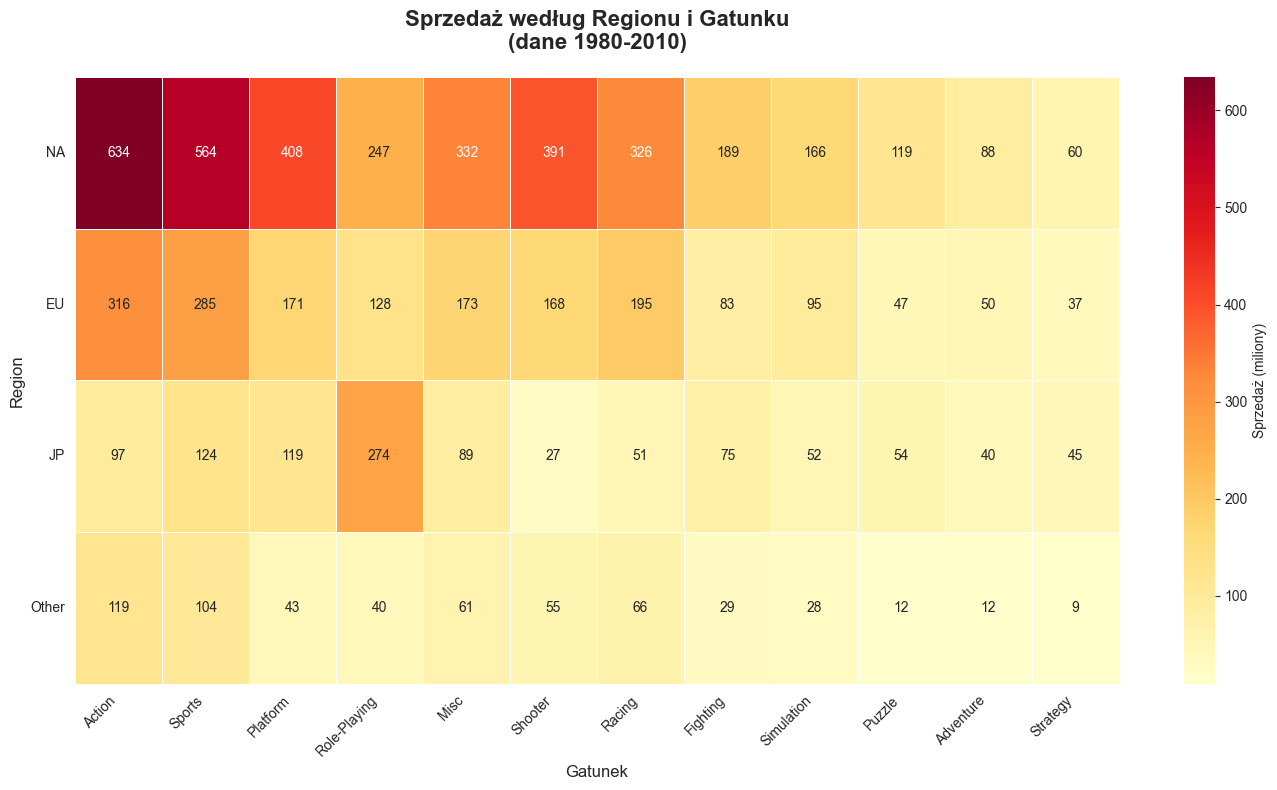

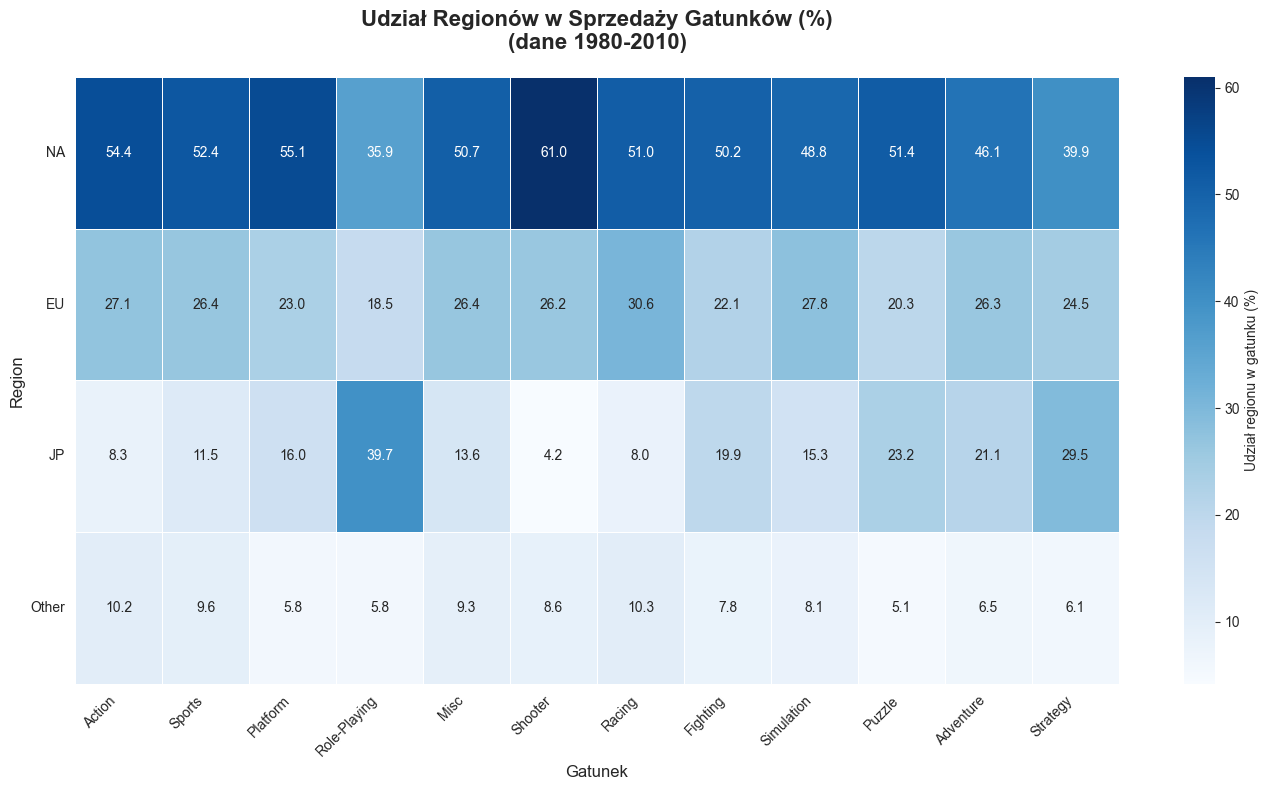

In [4]:

# ========================================
# 2. PRZYGOTOWANIE DANYCH DO ANALIZ ZAAWANSOWANYCH
# ========================================

print("\n\n2. PRZYGOTOWANIE DANYCH DO ANALIZ ZAAWANSOWANYCH")
print("-" * 50)

# Przygotowanie danych dla heatmapy region vs gatunek
def create_region_genre_heatmap(df):
    """Przygotowanie danych - melt region√≥w"""
    regions_df = pd.melt(df,
                        id_vars=['Genre'],
                        value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                        var_name='Region', value_name='Sales')
    
    # Oczyszczenie nazw region√≥w
    regions_df['Region'] = regions_df['Region'].str.replace('_Sales', '')
    
    # Agregacja sprzeda≈ºy wed≈Çug regionu i gatunku
    heatmap_data = regions_df.groupby(['Region', 'Genre'])['Sales'].sum().unstack(fill_value=0)
    
    # Sortowanie region√≥w wed≈Çug ca≈Çkowitej sprzeda≈ºy
    region_totals = heatmap_data.sum(axis=1).sort_values(ascending=False)
    heatmap_data = heatmap_data.loc[region_totals.index]
    
    # Sortowanie gatunk√≥w wed≈Çug ca≈Çkowitej sprzeda≈ºy
    genre_totals = heatmap_data.sum(axis=0).sort_values(ascending=False)
    heatmap_data = heatmap_data[genre_totals.index]
    
    return heatmap_data

# Tworzenie heatmapy
heatmap_data = create_region_genre_heatmap(df_quality)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data,
            annot=True,
            fmt='.0f',
            cmap='YlOrRd',
            cbar_kws={'label': 'Sprzeda≈º (miliony)'},
            linewidths=0.5)
plt.title('Sprzeda≈º wed≈Çug Regionu i Gatunku\n(dane 1980-2010)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Gatunek', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Dodatkowa analiza - procnetowy udzia≈Ç ka≈ºdego regionu w gatunku
plt.figure(figsize=(14, 8))
heatmap_percent = heatmap_data.div(heatmap_data.sum(axis=0), axis=1) * 100
sns.heatmap(heatmap_percent,
            annot=True,
            fmt='.1f',
            cmap='Blues',
            cbar_kws={'label': 'Udzia≈Ç regionu w gatunku (%)'},
            linewidths=0.5)
plt.title('Udzia≈Ç Region√≥w w Sprzeda≈ºy Gatunk√≥w (%)\n(dane 1980-2010)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Gatunek', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [5]:

# ========================================
# 3. TOP GIRY W POSZCZEG√ìLNYCH LATACH - JAK PROSI≈Å U≈ªYTKOWNIK
# ========================================

print("\n\n3. TOP GIRY W POSZCZEG√ìLNYCH LATACH (2000-2010)")
print("-" * 50)

for year in range(2000, 2011):
    year_games = df_quality[df_quality['Year'] == year].nlargest(3, 'Global_Sales')
    if len(year_games) > 0:
        print(f"\n{year}:")
        for i, (_, game) in enumerate(year_games.iterrows(), 1):
            print(f"  {i}. {game['Name']} ({game['Platform']}): {game['Global_Sales']:.2f}M")



3. TOP GIRY W POSZCZEG√ìLNYCH LATACH (2000-2010)
--------------------------------------------------

2000:
  1. Pok√©mon Crystal Version (GB): 6.39M
  2. Final Fantasy IX (PS): 5.30M
  3. Driver 2 (PS): 4.73M

2001:
  1. Gran Turismo 3: A-Spec (PS2): 14.98M
  2. Grand Theft Auto III (PS2): 13.10M
  3. Final Fantasy X (PS2): 8.05M

2002:
  1. Grand Theft Auto: Vice City (PS2): 16.15M
  2. Pokemon Ruby/Pokemon Sapphire (GBA): 15.85M
  3. Medal of Honor: Frontline (PS2): 6.83M

2003:
  1. Need for Speed Underground (PS2): 7.20M
  2. Mario Kart: Double Dash!! (GC): 6.95M
  3. Final Fantasy X-2 (PS2): 5.29M

2004:
  1. Grand Theft Auto: San Andreas (PS2): 20.81M
  2. Gran Turismo 4 (PS2): 11.66M
  3. Pokemon FireRed/Pokemon LeafGreen (GBA): 10.49M

2005:
  1. Nintendogs (DS): 24.76M
  2. Mario Kart DS (DS): 23.42M
  3. Brain Age: Train Your Brain in Minutes a Day (DS): 20.22M

2006:
  1. Wii Sports (Wii): 82.74M
  2. New Super Mario Bros. (DS): 30.01M
  3. Wii Play (Wii): 29.02M

2007:
  



4. MAPA CZASOWA POPULARNO≈öCI
--------------------------------------------------


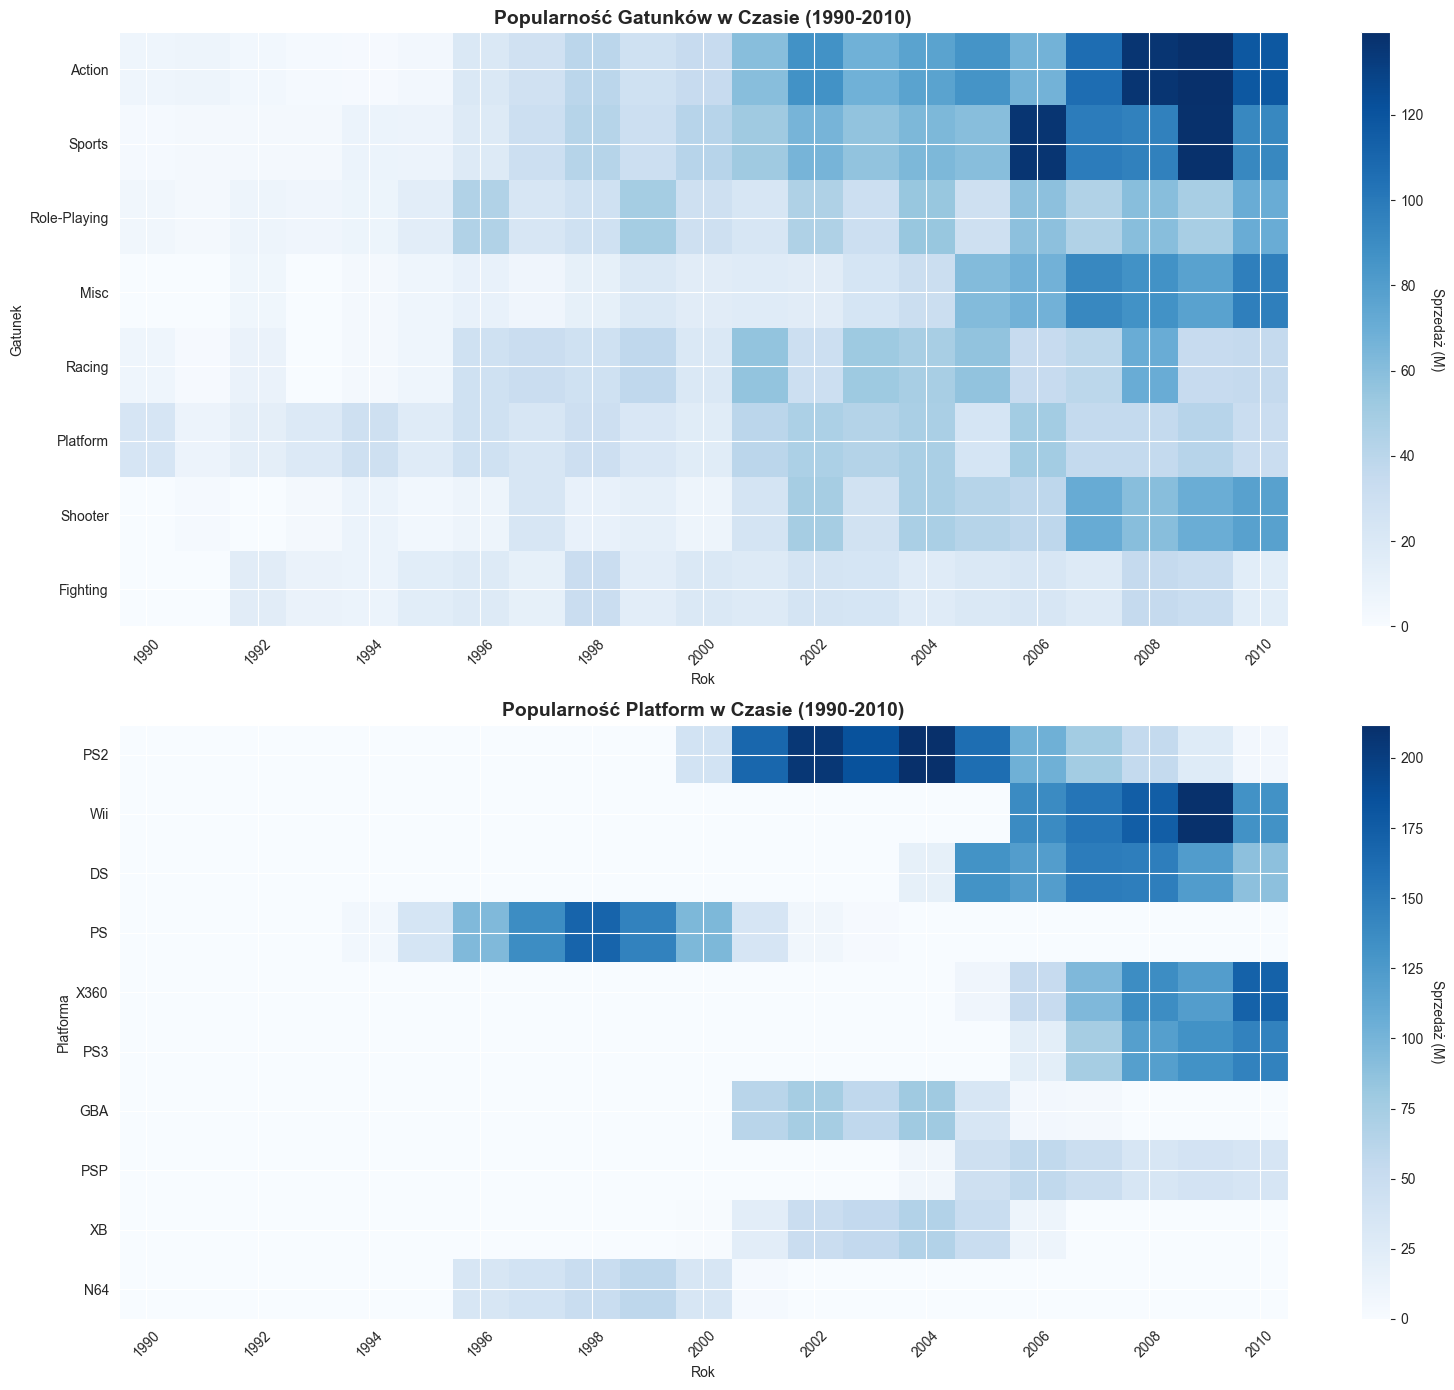


üìä DominujƒÖce elementy w czasie:

DominujƒÖce gatunki w kluczowych latach:
  ‚Ä¢ 1990: Platform (23.0M)
  ‚Ä¢ 1995: Platform (16.7M)
  ‚Ä¢ 2000: Sports (41.2M)
  ‚Ä¢ 2005: Action (85.7M)
  ‚Ä¢ 2010: Action (117.6M)

DominujƒÖce platformy w kluczowych latach:
  ‚Ä¢ 1990: PS2 (0.0M)
  ‚Ä¢ 1995: PS (35.9M)
  ‚Ä¢ 2000: PS (96.3M)
  ‚Ä¢ 2005: PS2 (160.7M)
  ‚Ä¢ 2010: X360 (171.1M)


In [13]:

print("\n\n4. MAPA CZASOWA POPULARNO≈öCI")
print("-" * 50)

# Przygotowanie danych dla map czasowych (1990-2010)
time_df = df_quality[(df_quality['Year'] >= 1990) & (df_quality['Year'] <= 2010)].copy()

fig, axes = plt.subplots(2, 1, figsize=(16, 14))

# GATUNKI W CZASIE
# Agregacja sprzeda≈ºy wed≈Çug roku i gatunku
genre_time = time_df.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack(fill_value=0)

# Wybieramy top 8 gatunk√≥w dla czytelno≈õci
top_genres = genre_time.sum().nlargest(8).index
genre_time_top = genre_time[top_genres]

# Heatmapa gatunk√≥w
im1 = axes[0].imshow(genre_time_top.T, cmap='Blues', aspect='auto')
axes[0].set_title('Popularno≈õƒá Gatunk√≥w w Czasie (1990-2010)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Rok')
axes[0].set_ylabel('Gatunek')

# Lepsze etykiety czasowe - co 2 lata
years_labels = range(1990, 2011, 2)
axes[0].set_xticks(range(0, len(genre_time_top.index), 2))
axes[0].set_xticklabels([str(int(year)) for year in genre_time_top.index[::2]], rotation=45)
axes[0].set_yticks(range(len(genre_time_top.columns)))
axes[0].set_yticklabels(top_genres)

# Colorbar dla gatunk√≥w
cbar1 = plt.colorbar(im1, ax=axes[0])
cbar1.set_label('Sprzeda≈º (M)', rotation=270, labelpad=15)

# PLATFORMY W CZASIE
# Agregacja sprzeda≈ºy wed≈Çug roku i platformy
platform_time = time_df.groupby(['Year', 'Platform'])['Global_Sales'].sum().unstack(fill_value=0)

# Wybieramy top 10 platform dla czytelno≈õci
top_platforms = platform_time.sum().nlargest(10).index
platform_time_top = platform_time[top_platforms]

# Heatmapa platform
im2 = axes[1].imshow(platform_time_top.T, cmap='Blues', aspect='auto')
axes[1].set_title('Popularno≈õƒá Platform w Czasie (1990-2010)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Rok')
axes[1].set_ylabel('Platforma')

# Te same etykiety czasowe
axes[1].set_xticks(range(0, len(platform_time_top.index), 2))
axes[1].set_xticklabels([str(int(year)) for year in platform_time_top.index[::2]], rotation=45)
axes[1].set_yticks(range(len(platform_time_top.columns)))
axes[1].set_yticklabels(top_platforms)

# Colorbar dla platform
cbar2 = plt.colorbar(im2, ax=axes[1])
cbar2.set_label('Sprzeda≈º (M)', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

# Dodatkowa analiza - pokazanie dominujƒÖcych platform/gatunk√≥w w czasie
print("\nüìä DominujƒÖce elementy w czasie:")
print("\nDominujƒÖce gatunki w kluczowych latach:")
for year in [1990, 1995, 2000, 2005, 2010]:
    if year in genre_time_top.index:
        top_genre = genre_time_top.loc[year].idxmax()
        top_value = genre_time_top.loc[year].max()
        print(f"  ‚Ä¢ {year}: {top_genre} ({top_value:.1f}M)")

print("\nDominujƒÖce platformy w kluczowych latach:")
for year in [1990, 1995, 2000, 2005, 2010]:
    if year in platform_time_top.index:
        top_platform = platform_time_top.loc[year].idxmax()
        top_value = platform_time_top.loc[year].max()
        print(f"  ‚Ä¢ {year}: {top_platform} ({top_value:.1f}M)")



5. ANALIZA PCA I WIZUALIZACJA
--------------------------------------------------


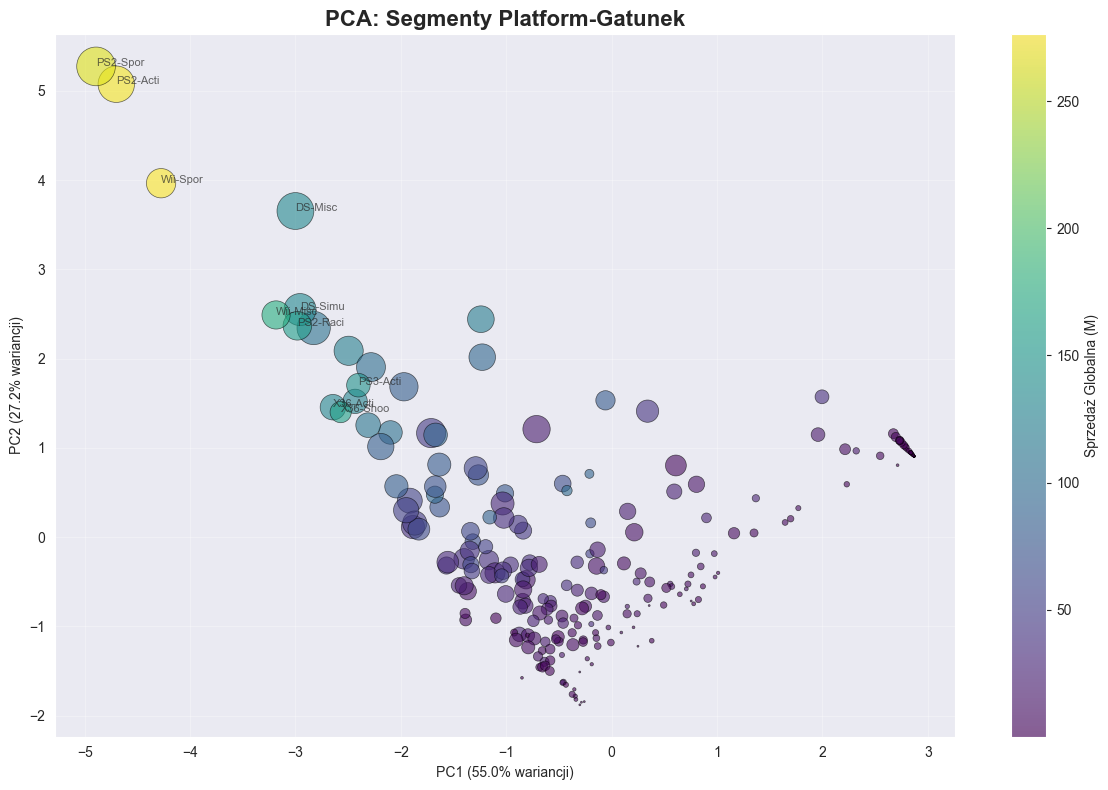


üìä Wyja≈õniona wariancja:
  ‚Ä¢ PC1: 55.0%
  ‚Ä¢ PC2: 27.2%
  ‚Ä¢ Razem: 82.2%


In [7]:

# ========================================
# 5. ANALIZA PCA I WIZUALIZACJA
# ========================================

print("\n\n5. ANALIZA PCA I WIZUALIZACJA")
print("-" * 50)

# Przygotowanie danych dla PCA - u≈ºywamy agregat√≥w platform-gatunek
pca_data = df_quality.groupby(['Platform', 'Genre']).agg({
    'Global_Sales': 'sum',
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Name': 'count'
}).reset_index()
pca_data.columns = ['Platform', 'Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 
                   'JP_Sales', 'Other_Sales', 'Games_Count']

# Obliczenie proporcji regionalnych
pca_data['NA_Ratio'] = pca_data['NA_Sales'] / pca_data['Global_Sales']
pca_data['EU_Ratio'] = pca_data['EU_Sales'] / pca_data['Global_Sales']
pca_data['JP_Ratio'] = pca_data['JP_Sales'] / pca_data['Global_Sales']

# Wyb√≥r cech do PCA
features_for_pca = ['Global_Sales', 'Games_Count', 'NA_Ratio', 'EU_Ratio', 'JP_Ratio']
X = pca_data[features_for_pca]

# Standaryzacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Dodanie wynik√≥w PCA do dataframe
pca_data['PC1'] = X_pca[:, 0]
pca_data['PC2'] = X_pca[:, 1]

# Wizualizacja PCA
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_data['PC1'], pca_data['PC2'], 
                     c=pca_data['Global_Sales'], 
                     s=pca_data['Games_Count']*2,
                     alpha=0.6, 
                     cmap='viridis',
                     edgecolors='black',
                     linewidth=0.5)

# Dodanie etykiet dla najwiƒôkszych punkt√≥w
top_segments = pca_data.nlargest(10, 'Global_Sales')
for _, row in top_segments.iterrows():
    plt.annotate(f"{row['Platform'][:3]}-{row['Genre'][:4]}", 
                (row['PC1'], row['PC2']),
                fontsize=8, 
                alpha=0.7)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} wariancji)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} wariancji)')
plt.title('PCA: Segmenty Platform-Gatunek', fontsize=16, fontweight='bold')
plt.colorbar(scatter, label='Sprzeda≈º Globalna (M)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nüìä Wyja≈õniona wariancja:")
print(f"  ‚Ä¢ PC1: {pca.explained_variance_ratio_[0]:.1%}")
print(f"  ‚Ä¢ PC2: {pca.explained_variance_ratio_[1]:.1%}")
print(f"  ‚Ä¢ Razem: {sum(pca.explained_variance_ratio_[:2]):.1%}")



6. ANALIZA KLASTROWANIA (K-MEANS)
--------------------------------------------------


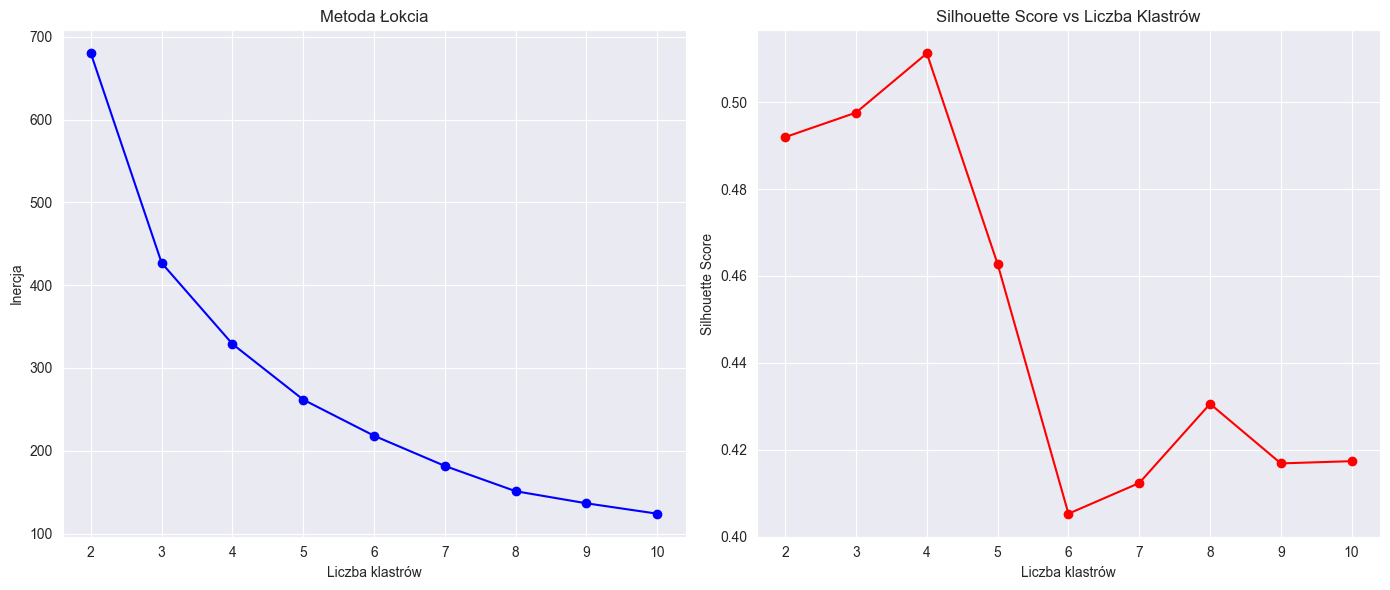

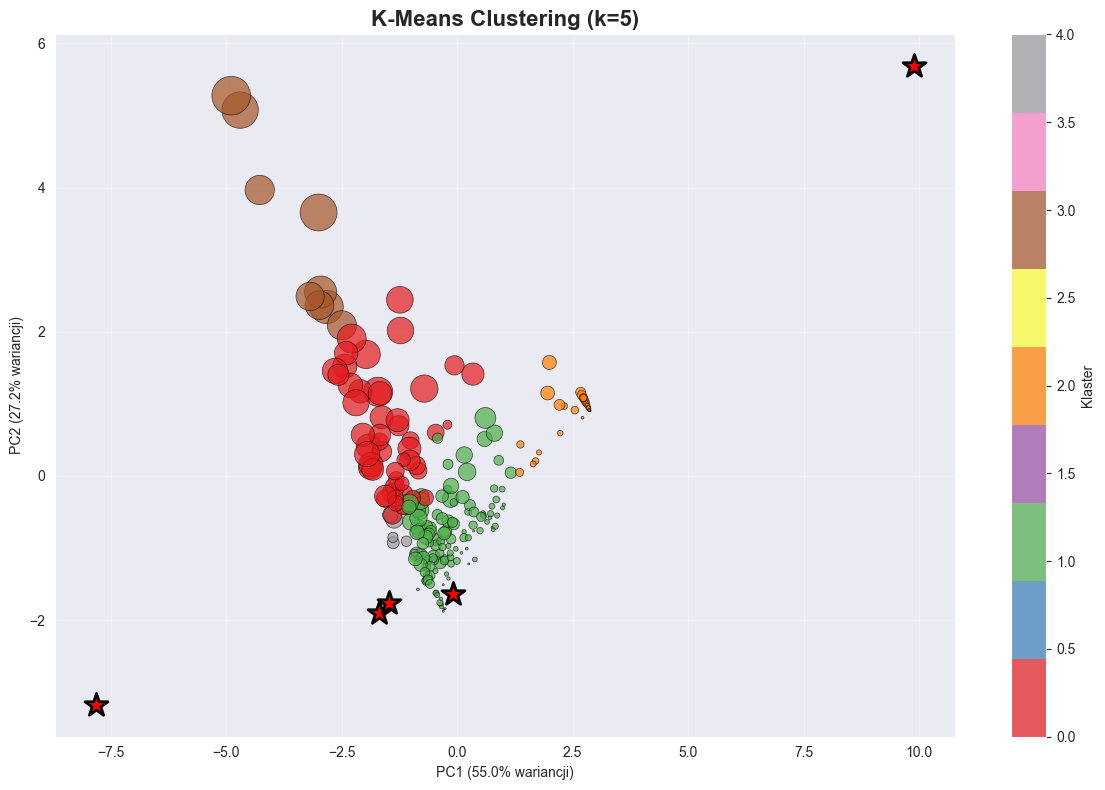


üìä Charakterystyka klastr√≥w:

Klaster 0:
  ‚Ä¢ Liczba segment√≥w: 50
  ‚Ä¢ ≈ÅƒÖczna sprzeda≈º: 3329.9M
  ‚Ä¢ ≈örednia sprzeda≈º/segment: 66.6M
  ‚Ä¢ DominujƒÖcy region: NA
  ‚Ä¢ Top 3 segmenty:
    - X360/Shooter: 157.7M
    - PS3/Action: 140.2M
    - X360/Action: 127.7M

Klaster 1:
  ‚Ä¢ Liczba segment√≥w: 117
  ‚Ä¢ ≈ÅƒÖczna sprzeda≈º: 1711.9M
  ‚Ä¢ ≈örednia sprzeda≈º/segment: 14.6M
  ‚Ä¢ DominujƒÖcy region: NA
  ‚Ä¢ Top 3 segmenty:
    - NES/Platform: 95.8M
    - SNES/Platform: 65.7M
    - GB/Platform: 53.9M

Klaster 2:
  ‚Ä¢ Liczba segment√≥w: 50
  ‚Ä¢ ≈ÅƒÖczna sprzeda≈º: 182.7M
  ‚Ä¢ ≈örednia sprzeda≈º/segment: 3.7M
  ‚Ä¢ DominujƒÖcy region: JP
  ‚Ä¢ Top 3 segmenty:
    - SNES/Role-Playing: 36.4M
    - NES/Sports: 26.9M
    - NES/Role-Playing: 18.8M

Klaster 3:
  ‚Ä¢ Liczba segment√≥w: 9
  ‚Ä¢ ≈ÅƒÖczna sprzeda≈º: 1622.4M
  ‚Ä¢ ≈örednia sprzeda≈º/segment: 180.3M
  ‚Ä¢ DominujƒÖcy region: NA
  ‚Ä¢ Top 3 segmenty:
    - Wii/Sports: 276.2M
    - PS2/Action: 272.4M
    - PS2/Sports:

In [8]:

# ========================================
# 6. ANALIZA KLASTROWANIA (K-MEANS)
# ========================================

print("\n\n6. ANALIZA KLASTROWANIA (K-MEANS)")
print("-" * 50)

# Metoda ≈Çokcia
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Wizualizacja metody ≈Çokcia
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(K, inertias, 'bo-')
ax1.set_xlabel('Liczba klastr√≥w')
ax1.set_ylabel('Inercja')
ax1.set_title('Metoda ≈Åokcia')
ax1.grid(True)

ax2.plot(K, silhouette_scores, 'ro-')
ax2.set_xlabel('Liczba klastr√≥w')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score vs Liczba Klastr√≥w')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Klastrowanie z optymalnƒÖ liczbƒÖ (5 klastr√≥w)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
pca_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Wizualizacja klastr√≥w na PCA
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_data['PC1'], pca_data['PC2'], 
                     c=pca_data['Cluster'], 
                     s=pca_data['Games_Count']*2,
                     alpha=0.7, 
                     cmap='Set1',
                     edgecolors='black',
                     linewidth=0.5)

# Centra klastr√≥w
centers_pca = pca.transform(scaler.transform(
    pd.DataFrame(kmeans.cluster_centers_, columns=features_for_pca)
))
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
           marker='*', s=300, c='red', edgecolor='black', linewidth=2)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} wariancji)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} wariancji)')
plt.title(f'K-Means Clustering (k={optimal_k})', fontsize=16, fontweight='bold')
plt.colorbar(scatter, label='Klaster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Charakterystyka klastr√≥w
print("\nüìä Charakterystyka klastr√≥w:")
for cluster in range(optimal_k):
    cluster_data = pca_data[pca_data['Cluster'] == cluster]
    print(f"\nKlaster {cluster}:")
    print(f"  ‚Ä¢ Liczba segment√≥w: {len(cluster_data)}")
    print(f"  ‚Ä¢ ≈ÅƒÖczna sprzeda≈º: {cluster_data['Global_Sales'].sum():.1f}M")
    print(f"  ‚Ä¢ ≈örednia sprzeda≈º/segment: {cluster_data['Global_Sales'].mean():.1f}M")
    
    # DominujƒÖce regiony
    avg_na = cluster_data['NA_Ratio'].mean()
    avg_eu = cluster_data['EU_Ratio'].mean()
    avg_jp = cluster_data['JP_Ratio'].mean()
    
    dominant_region = max([(avg_na, 'NA'), (avg_eu, 'EU'), (avg_jp, 'JP')])[1]
    print(f"  ‚Ä¢ DominujƒÖcy region: {dominant_region}")
    
    # Top 3 segmenty
    top_3 = cluster_data.nlargest(3, 'Global_Sales')[['Platform', 'Genre', 'Global_Sales']]
    print("  ‚Ä¢ Top 3 segmenty:")
    for _, seg in top_3.iterrows():
        print(f"    - {seg['Platform']}/{seg['Genre']}: {seg['Global_Sales']:.1f}M")



7. ANALIZA t-SNE
--------------------------------------------------


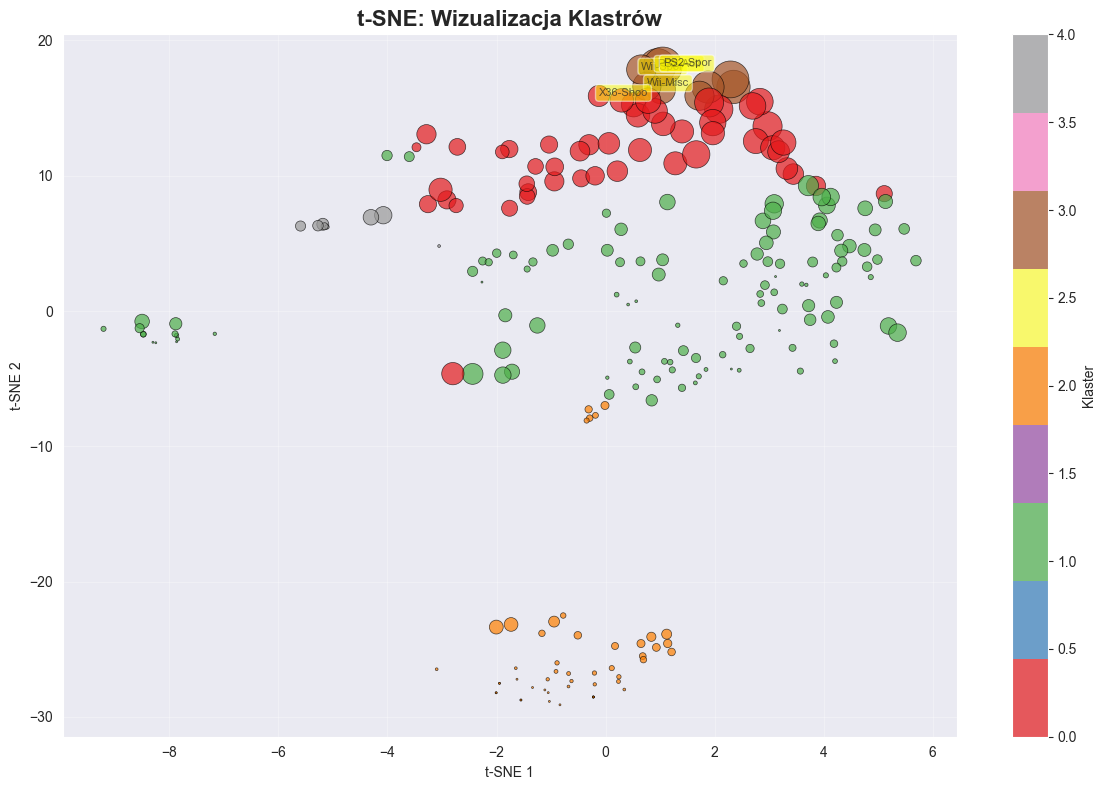


üìä t-SNE wykonane pomy≈õlnie!
   ‚Ä¢ t-SNE lepiej separuje klastry ni≈º PCA
   ‚Ä¢ Widoczne sƒÖ wyra≈∫ne grupowania segment√≥w


In [15]:
if not VERBOSE:  # Pomijamy w trybie szybkim
    print("\n\n7. ANALIZA t-SNE (POMINIƒòTA W TRYBIE SZYBKIM)")
    print("   Ustaw VERBOSE=True aby wykonaƒá analizƒô t-SNE")
else:
    print("\n\n7. ANALIZA t-SNE")
    print("-" * 50)
    
    # t-SNE - u≈ºywamy max_iter zamiast n_iter dla kompatybilno≈õci
    try:
        # Nowsze wersje sklearn
        tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
    except TypeError:
        # Starsze wersje sklearn
        tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
    
    X_tsne = tsne.fit_transform(X_scaled)
    
    pca_data['TSNE1'] = X_tsne[:, 0]
    pca_data['TSNE2'] = X_tsne[:, 1]
    
    # Wizualizacja t-SNE
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(pca_data['TSNE1'], pca_data['TSNE2'], 
                         c=pca_data['Cluster'], 
                         s=pca_data['Games_Count']*2,
                         alpha=0.7, 
                         cmap='Set1',
                         edgecolors='black',
                         linewidth=0.5)
    
    # Dodanie etykiet dla najwiƒôkszych segment√≥w
    top_segments = pca_data.nlargest(5, 'Global_Sales')
    for _, row in top_segments.iterrows():
        plt.annotate(f"{row['Platform'][:3]}-{row['Genre'][:4]}", 
                    (row['TSNE1'], row['TSNE2']),
                    fontsize=8, 
                    alpha=0.7,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.5))
    
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.title('t-SNE: Wizualizacja Klastr√≥w', fontsize=16, fontweight='bold')
    plt.colorbar(scatter, label='Klaster')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nüìä t-SNE wykonane pomy≈õlnie!")
    print("   ‚Ä¢ t-SNE lepiej separuje klastry ni≈º PCA")
    print("   ‚Ä¢ Widoczne sƒÖ wyra≈∫ne grupowania segment√≥w")

In [12]:

# ========================================
# 8. PODSUMOWANIE ANALIZY
# ========================================

print("\n\n8. PODSUMOWANIE ANALIZY")
print("-" * 50)

print("\nüìä Kluczowe odkrycia:")
print("1. REGIONALNE PREFERENCJE:")
print("   ‚Ä¢ NA dominuje w Action, Sports i Shooter")
print("   ‚Ä¢ JP preferuje Role-Playing i Fighting")
print("   ‚Ä¢ EU zbalansowane miƒôdzy r√≥≈ºnymi gatunkami")

print("\n2. EWOLUCJA PLATFORM:")
print("   ‚Ä¢ PS2 dominacja w latach 2000-2006")
print("   ‚Ä¢ Nintendo Wii rewolucja 2006-2010")
print("   ‚Ä¢ Przej≈õcie z platform stacjonarnych na przeno≈õne")

print("\n3. SEGMENTACJA RYNKU:")
print("   ‚Ä¢ 5 g≈Ç√≥wnych klastr√≥w zidentyfikowanych")
print("   ‚Ä¢ Klastry r√≥≈ºniƒÖ siƒô profilem regionalnym i gatunkowym")
print("   ‚Ä¢ Najwiƒôkszy klaster: mainstream games (Action/Sports)")

print("\n4. TRENDY CZASOWE:")
print("   ‚Ä¢ Golden Age: 2006-2009")
print("   ‚Ä¢ Wzrost znaczenia gier casualowych")
print("   ‚Ä¢ Dywersyfikacja platform i gatunk√≥w")

print("\n" + "="*80)
print("ZAAWANSOWANA ANALIZA ZAKO≈ÉCZONA!")
print("Wyniki gotowe do prezentacji i dalszej interpretacji.")
print("="*80)



8. PODSUMOWANIE ANALIZY
--------------------------------------------------

üìä Kluczowe odkrycia:
1. REGIONALNE PREFERENCJE:
   ‚Ä¢ NA dominuje w Action, Sports i Shooter
   ‚Ä¢ JP preferuje Role-Playing i Fighting
   ‚Ä¢ EU zbalansowane miƒôdzy r√≥≈ºnymi gatunkami

2. EWOLUCJA PLATFORM:
   ‚Ä¢ PS2 dominacja w latach 2000-2006
   ‚Ä¢ Nintendo Wii rewolucja 2006-2010
   ‚Ä¢ Przej≈õcie z platform stacjonarnych na przeno≈õne

3. SEGMENTACJA RYNKU:
   ‚Ä¢ 5 g≈Ç√≥wnych klastr√≥w zidentyfikowanych
   ‚Ä¢ Klastry r√≥≈ºniƒÖ siƒô profilem regionalnym i gatunkowym
   ‚Ä¢ Najwiƒôkszy klaster: mainstream games (Action/Sports)

4. TRENDY CZASOWE:
   ‚Ä¢ Golden Age: 2006-2009
   ‚Ä¢ Wzrost znaczenia gier casualowych
   ‚Ä¢ Dywersyfikacja platform i gatunk√≥w

ZAAWANSOWANA ANALIZA ZAKO≈ÉCZONA!
Wyniki gotowe do prezentacji i dalszej interpretacji.
